In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
# read excel data
def read_excel_data(excel_file):
    df = pd.read_csv(excel_file)
    return df
df = read_excel_data('Dataset-vf.csv')

In [3]:
df.head()

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12,X15,X13,X14,Y
0,43,59.0,11,120,150,2709,2114,228,217,120,0.66,269,R1,FC11,CA49,BMW
1,0,54.0,7,0,693,2802,162,224,225,136,0.35,195,NaN,FC11,CA50,BMW
2,0,28.0,12,0,1260,2325,162,215,213,133,0.89,750,NaN,FC14,CA26,Mercedes
3,16,112.0,8,272,3649,2837,6221,235,231,128,0.27,-155,NaN,FC11,CA32,Ford
4,10,59.0,7,134,900,2509,5184,226,226,134,0.93,88,NaN,FC11,CA38,BMW


In [4]:
#report numerical data
display(df.describe(include=[np.number]))

#check for null values
display(df.isnull().sum())


,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12
count,6124.000000,5520.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000
mean,47.550621,151.293659,16.794579,192.488080,1541.308459,2645.712933,1442.194154,216.777106,218.770411,129.345852,0.493588,6.209993
std,57.465790,103.437461,8.995704,179.689943,1296.494523,393.799727,1123.945559,30.475508,23.550070,48.693500,0.290903,573.410551
min,-134.000000,0.000000,0.000000,0.000000,0.000000,1903.000000,30.000000,59.000000,99.000000,0.000000,0.000000,-1000.000000
25%,2.000000,71.000000,10.000000,42.000000,636.000000,2287.000000,663.000000,202.000000,207.000000,97.000000,0.240000,-492.250000
50%,27.000000,122.000000,15.000000,150.000000,1158.000000,2699.000000,1189.000000,224.000000,223.000000,134.000000,0.490000,21.000000
75%,77.000000,230.250000,23.000000,295.000000,2010.500000,2939.250000,1879.000000,239.000000,236.000000,163.000000,0.750000,495.000000
max,334.000000,359.000000,49.000000,1129.000000,6890.000000,3675.000000,6853.000000,254.000000,254.000000,248.000000,1.000000,1000.000000


X5        0
X2      604
X3        0
X4        0
X6        0
X1        0
X10       0
X7        0
X8        0
X9        0
X11       0
X12       0
X15    5523
X13       0
X14       0
Y         0
dtype: int64

In [5]:
print(df['X15'].value_counts())
print(df.shape)

R3    229
R2    190
R1    181
R       1
Name: X15, dtype: int64
(6124, 16)


## Dealing with Null Values

In [6]:
#replace null values with mean
df['X2'].fillna(df['X2'].mean(), inplace=True)
#delete column with null values
df.dropna(axis=1, inplace=True)

In [7]:
df.isnull().sum()


X5     0
X2     0
X3     0
X4     0
X6     0
X1     0
X10    0
X7     0
X8     0
X9     0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64

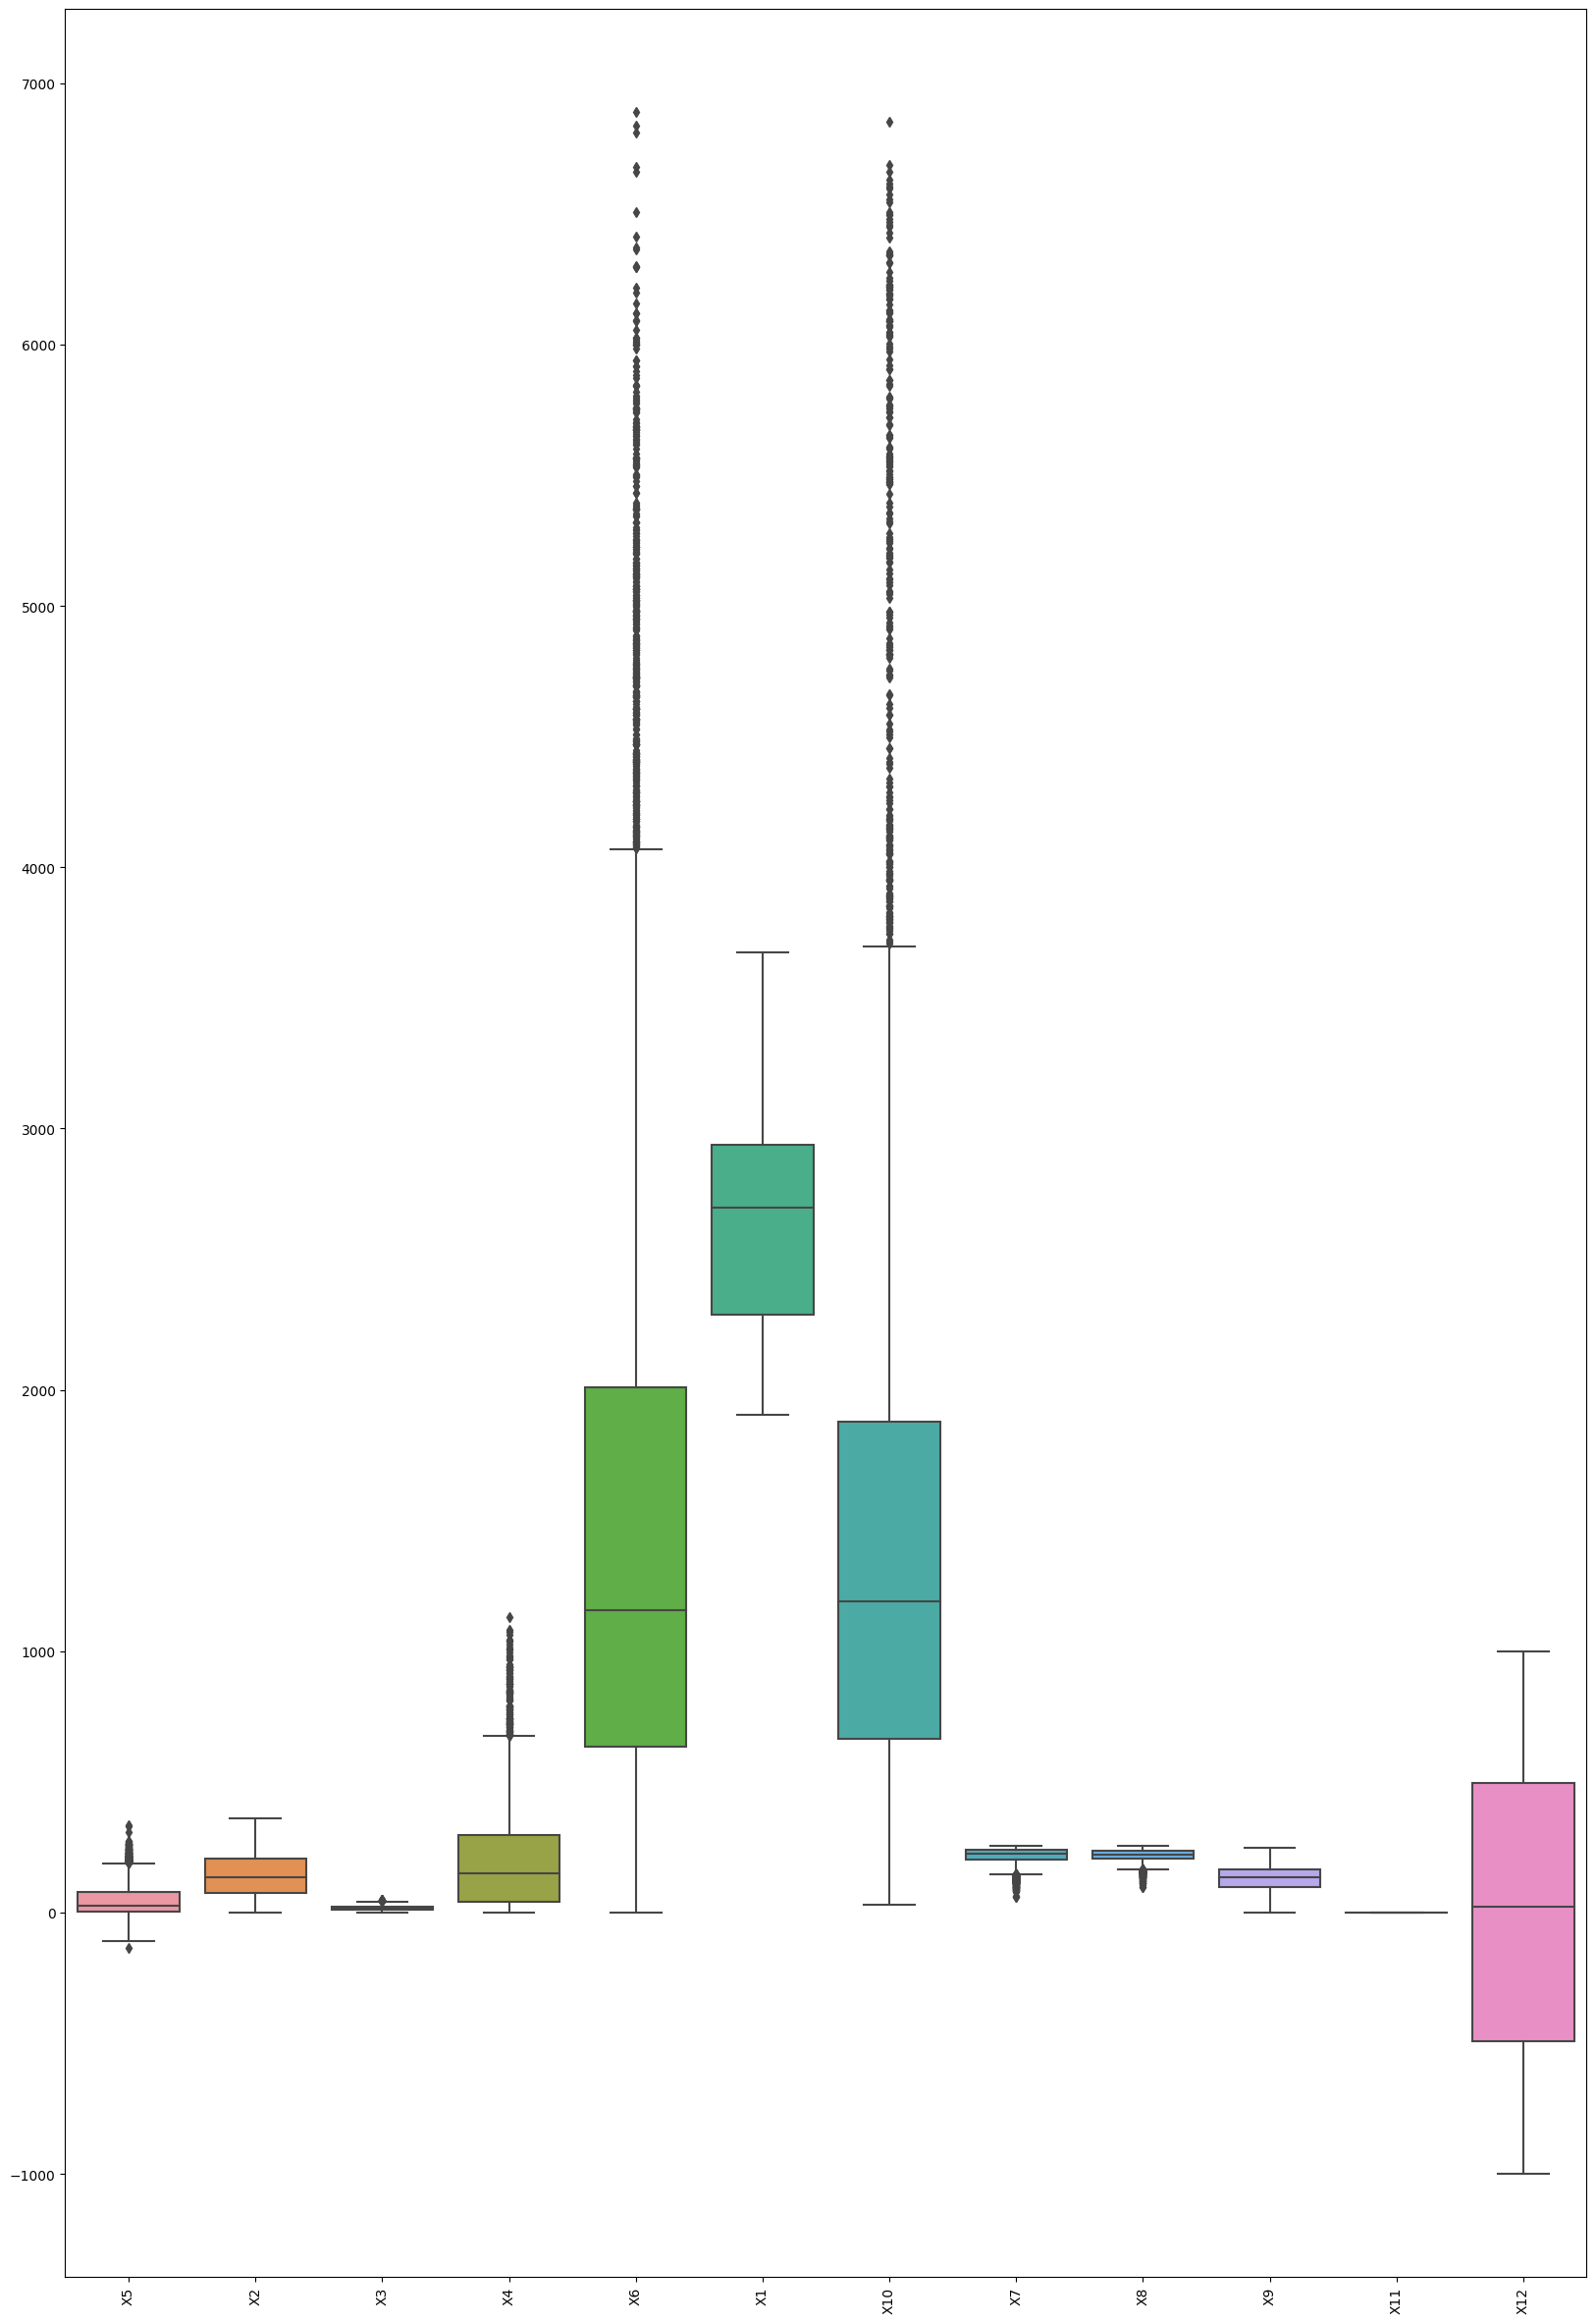

In [8]:
#check for outliers for all data which has X5	X2	X3	X4	X6	X1	X10	X7	X8	X9	X11	X12	X15	X13	X14	Y in multiple boxplots

# fig, axs = plt.subplots(6, 2, figsize=(40, 80))
# for i in range(6):
#     for j in range(2):
#         plt1 = sns.boxplot(df[df.columns[i+j]], ax = axs[i,j])
#         plt1.set(xlabel=df.columns[i+j])
#         plt1.set_title(df.columns[i+j], fontsize=50)


# plt.tight_layout()

#check for outliers for all data which has X5	X2	X3	X4	X6	X1	X10	X7	X8	X9	X11	X12	X15	X13	X14	Y in multiple boxplots
plt.figure(figsize=(20,30))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()





## Information of Categorical Data

In [9]:
#uniques of all columns
for i in ['X14', 'X13', 'Y']:
    print("Name:",i,"|Data", df[i].unique()," |Count",len(df[i].unique()))

Name: X14 |Data [' CA49' ' CA50' ' CA26' ' CA32' ' CA38' ' CA42' ' CA37' ' CA23' ' CA24'
 ' CA21' ' CA43' ' CA22' ' CA36' ' CA33' ' CA44' ' CA59' ' CA30' ' CA51'
 ' CA52' ' CA31' ' CA40' ' CA58' ' CA25' ' CA39' ' CA53' ' CA60' ' CA46'
 ' CA34' ' CA41' ' CA48' ' CA54' ' CA55']  |Count 32
Name: X13 |Data [' FC11' ' FC14' ' FC13' ' FC12']  |Count 4
Name: Y |Data ['BMW' 'Mercedes' 'Ford' 'Toyota' 'Honda' 'GMC']  |Count 6


In [10]:
# print number of unique value of Y and there number of values
print(df['Y'].value_counts())

Mercedes    1620
BMW         1571
Toyota      1275
Honda       1250
GMC          308
Ford         100
Name: Y, dtype: int64


In [14]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [15]:
!pip install imblearn

## Binary encoding of categorical data

In [16]:
# Binary encoding for X14 , X13, Y
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['X14', 'X13'])
df = encoder.fit_transform(df)

In [17]:
df.columns

Index(['X5', 'X2', 'X3', 'X4', 'X6', 'X1', 'X10', 'X7', 'X8', 'X9', 'X11',
       'X12', 'X13_0', 'X13_1', 'X13_2', 'X14_0', 'X14_1', 'X14_2', 'X14_3',
       'X14_4', 'X14_5', 'Y'],
      dtype='object')

## Splitting the data into training and testing data

In [18]:
#split data into train and test
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4899, 21) (1225, 21) (4899,) (1225,)


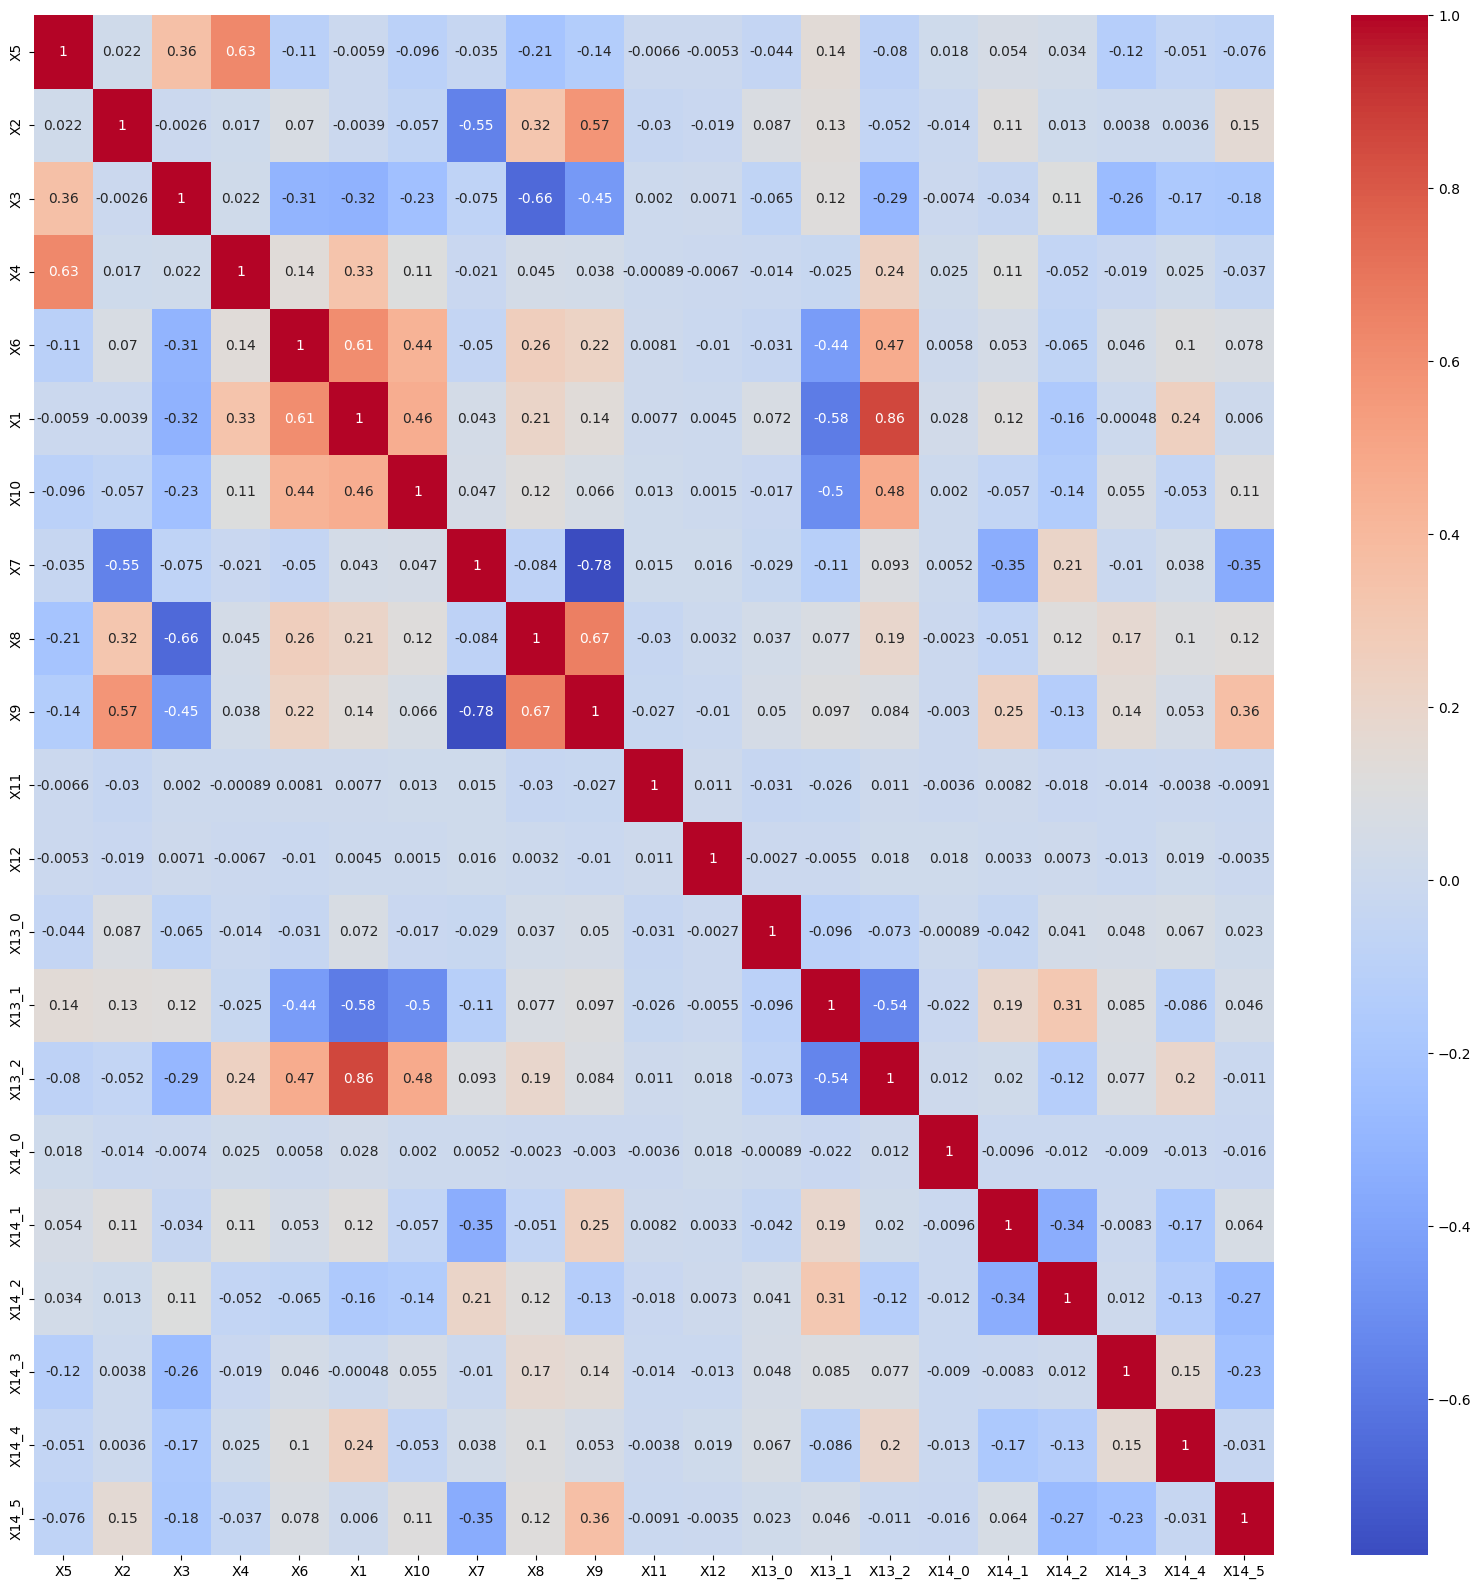

    Feature 1 Feature 2  Correlation
102        X1     X14_3    -0.000475
63         X4       X11    -0.000886
176     X13_0     X14_0    -0.000892
109       X10       X12     0.001517
113       X10     X14_0     0.002013
..        ...       ...          ...
2          X5        X4     0.627440
44         X3        X8    -0.659621
132        X8        X9     0.665765
120        X7        X9    -0.780204
98         X1     X13_2     0.858707

[210 rows x 3 columns]


In [19]:
# display correlation matrix

corr = X_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Take the upper triangle of the correlation matrix, excluding the diagonal
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
correlation_pairs = upper_triangle.stack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
sorted_pairs = correlation_pairs.reindex(correlation_pairs.Correlation.abs().sort_values(ascending=True).index)
print(sorted_pairs)


In [21]:
!pip install seaborn

## Dealing with Inbalance Data

In [22]:
#SMOTE, oversampling, undersampling, SMOTEENN, SMOTETomek, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC
from imblearn.over_sampling import SMOTE
from collections import Counter


# summarize class distribution
counter = Counter(y_train)
print(counter)

#plot barplot of y_train
sns.barplot(x=counter.keys(), y=counter.values())
plt.show()



Counter({'Mercedes': 1303, 'BMW': 1268, 'Toyota': 1032, 'Honda': 988, 'GMC': 227, 'Ford': 81})


AttributeError: ignored

In [23]:
# transform the dataset
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


# summarize the new class distribution
counter = Counter(y_train)
print(counter)
#plot barplot of y_train
sns.barplot(x=counter.keys(), y=counter.values())
plt.show()


Counter({'Toyota': 1303, 'Mercedes': 1303, 'Honda': 1303, 'BMW': 1303, 'GMC': 1303, 'Ford': 1303})


AttributeError: ignored

## Binary encoding of y

In [24]:
# Binary encoding for X14 , X13, Y
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
# encoder = ce.BinaryEncoder()
print(X_train.shape, y_train.shape)
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)
print(y_train_encoded.shape, y_test_encoded.shape)

(7818, 21) (7818,)
(7818, 6) (1225, 6)


In [ ]:
# y_train.columns

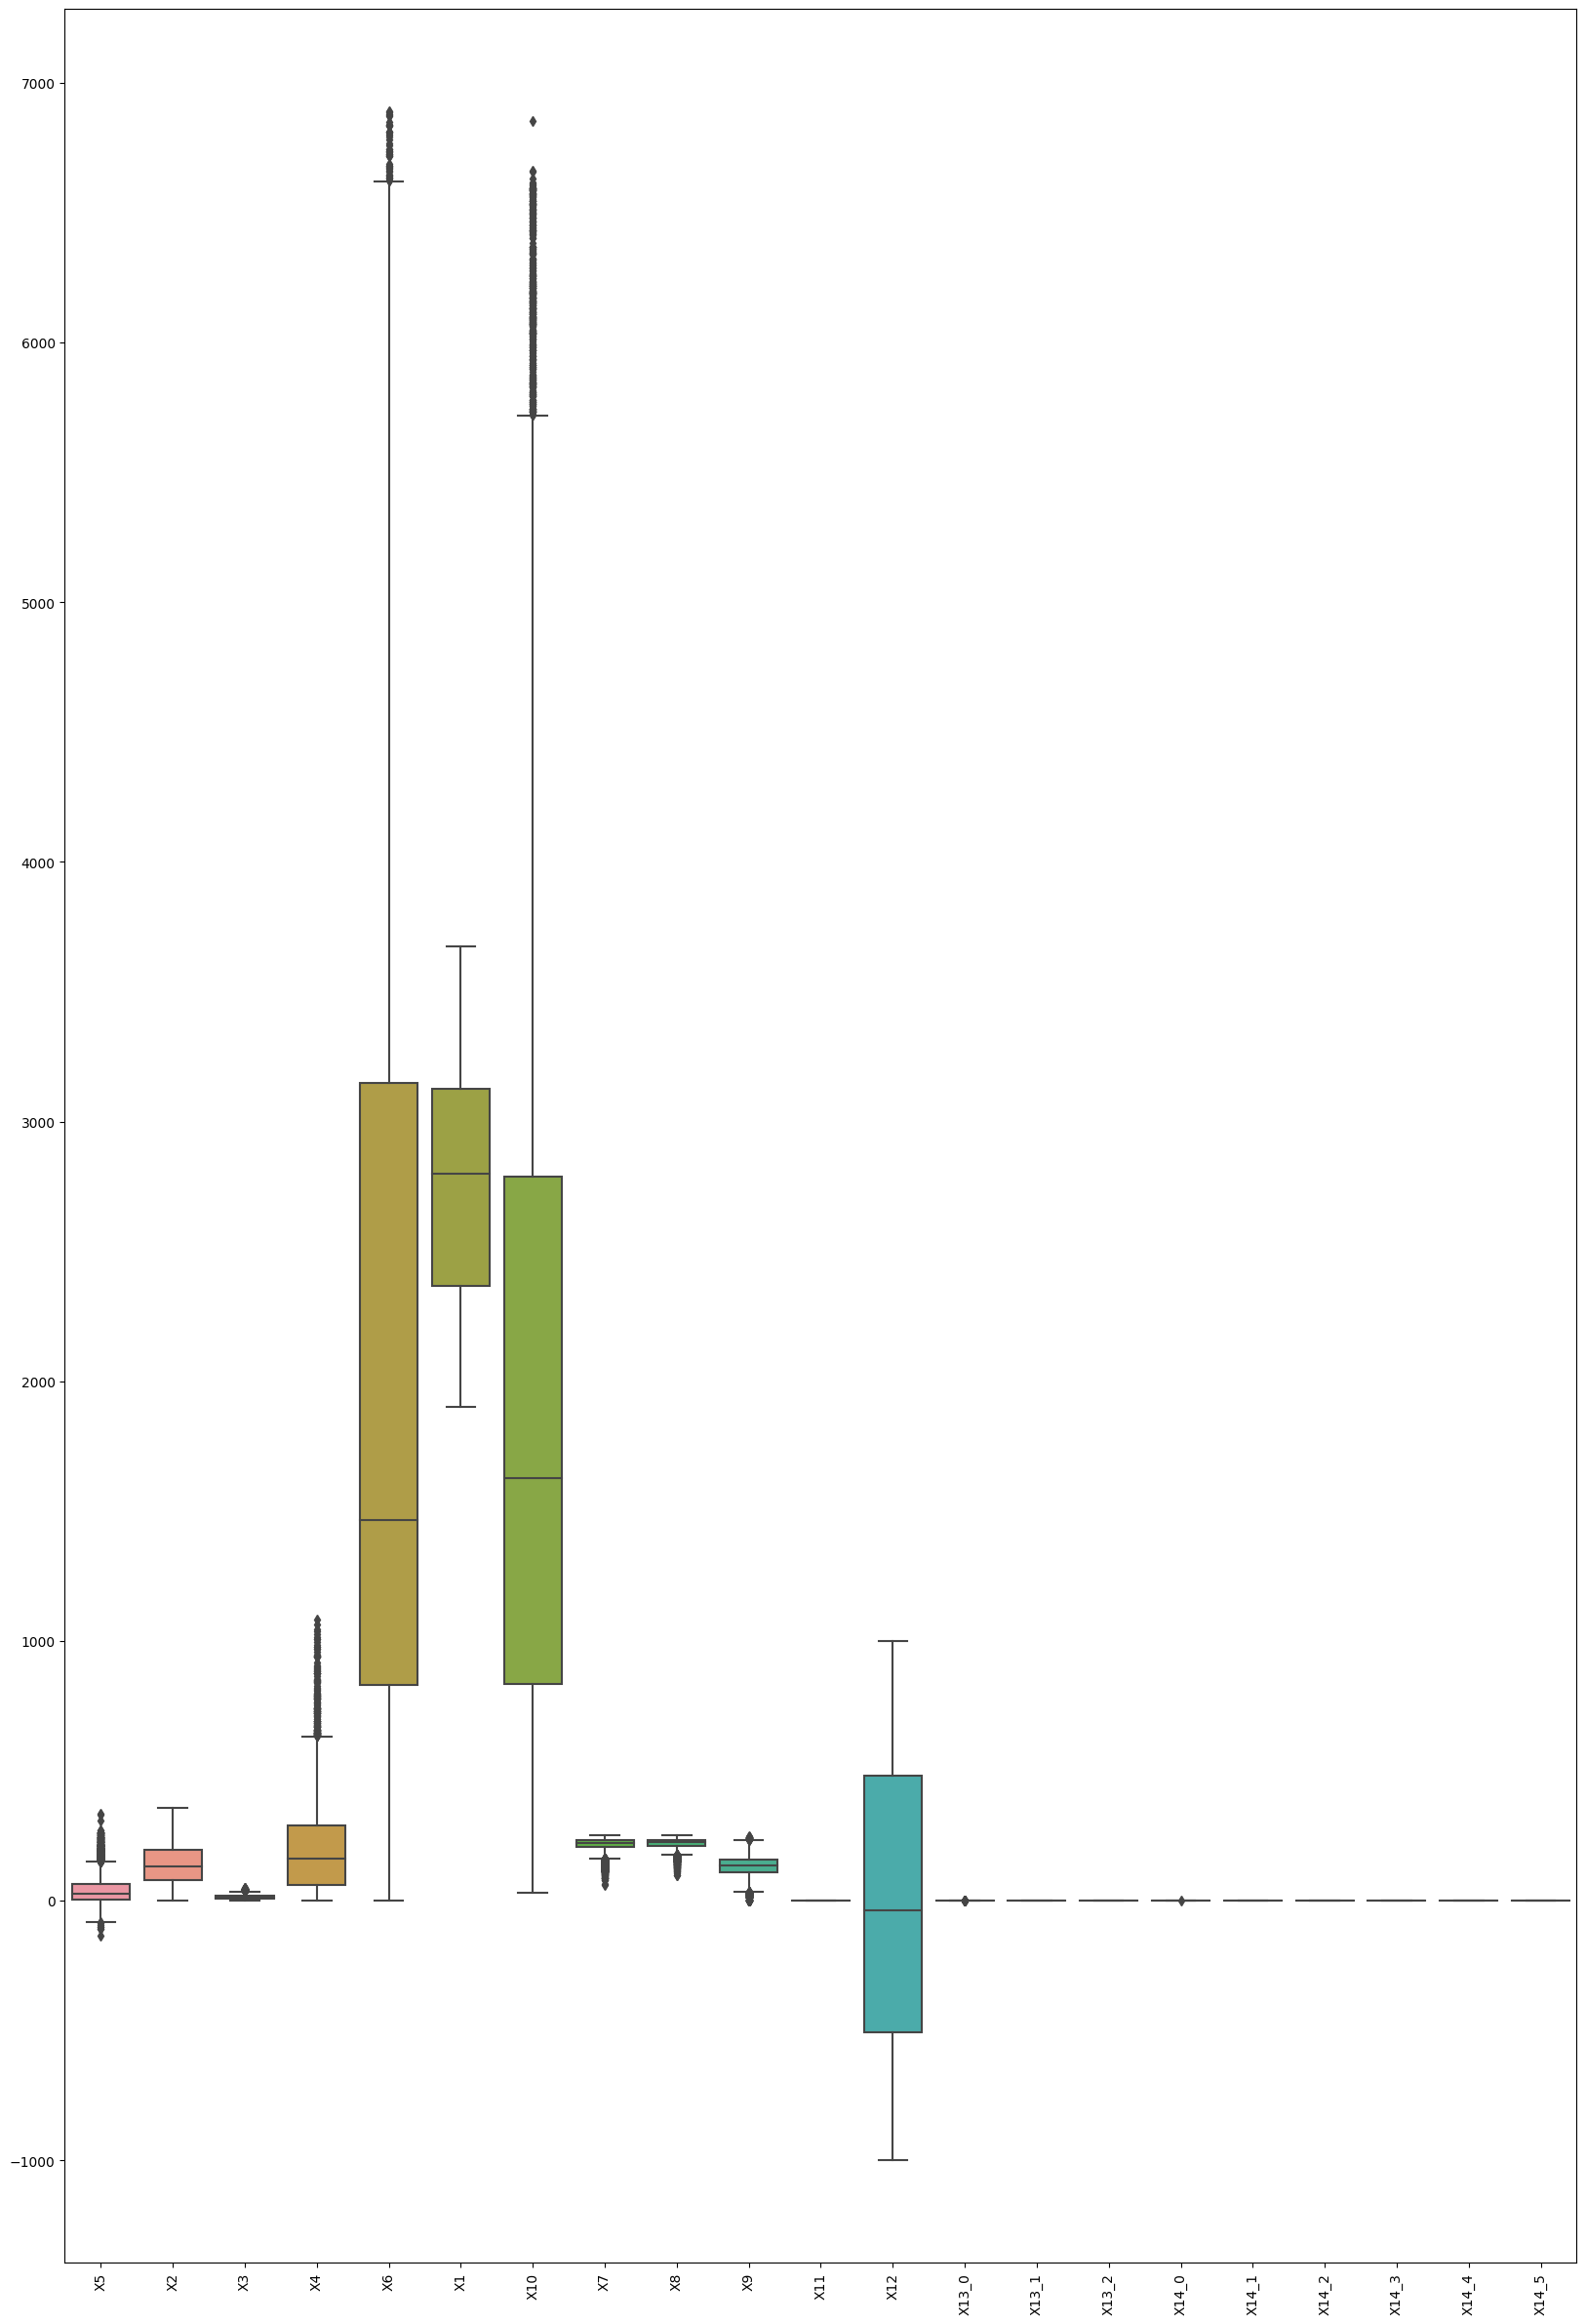

In [25]:
plt.figure(figsize=(20,30))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

## Data Normalization

In [26]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape)


(7818, 21) (1225, 21) (7818,) (1225,)
(7818, 21) (1225, 21) (7818, 6) (1225, 6)


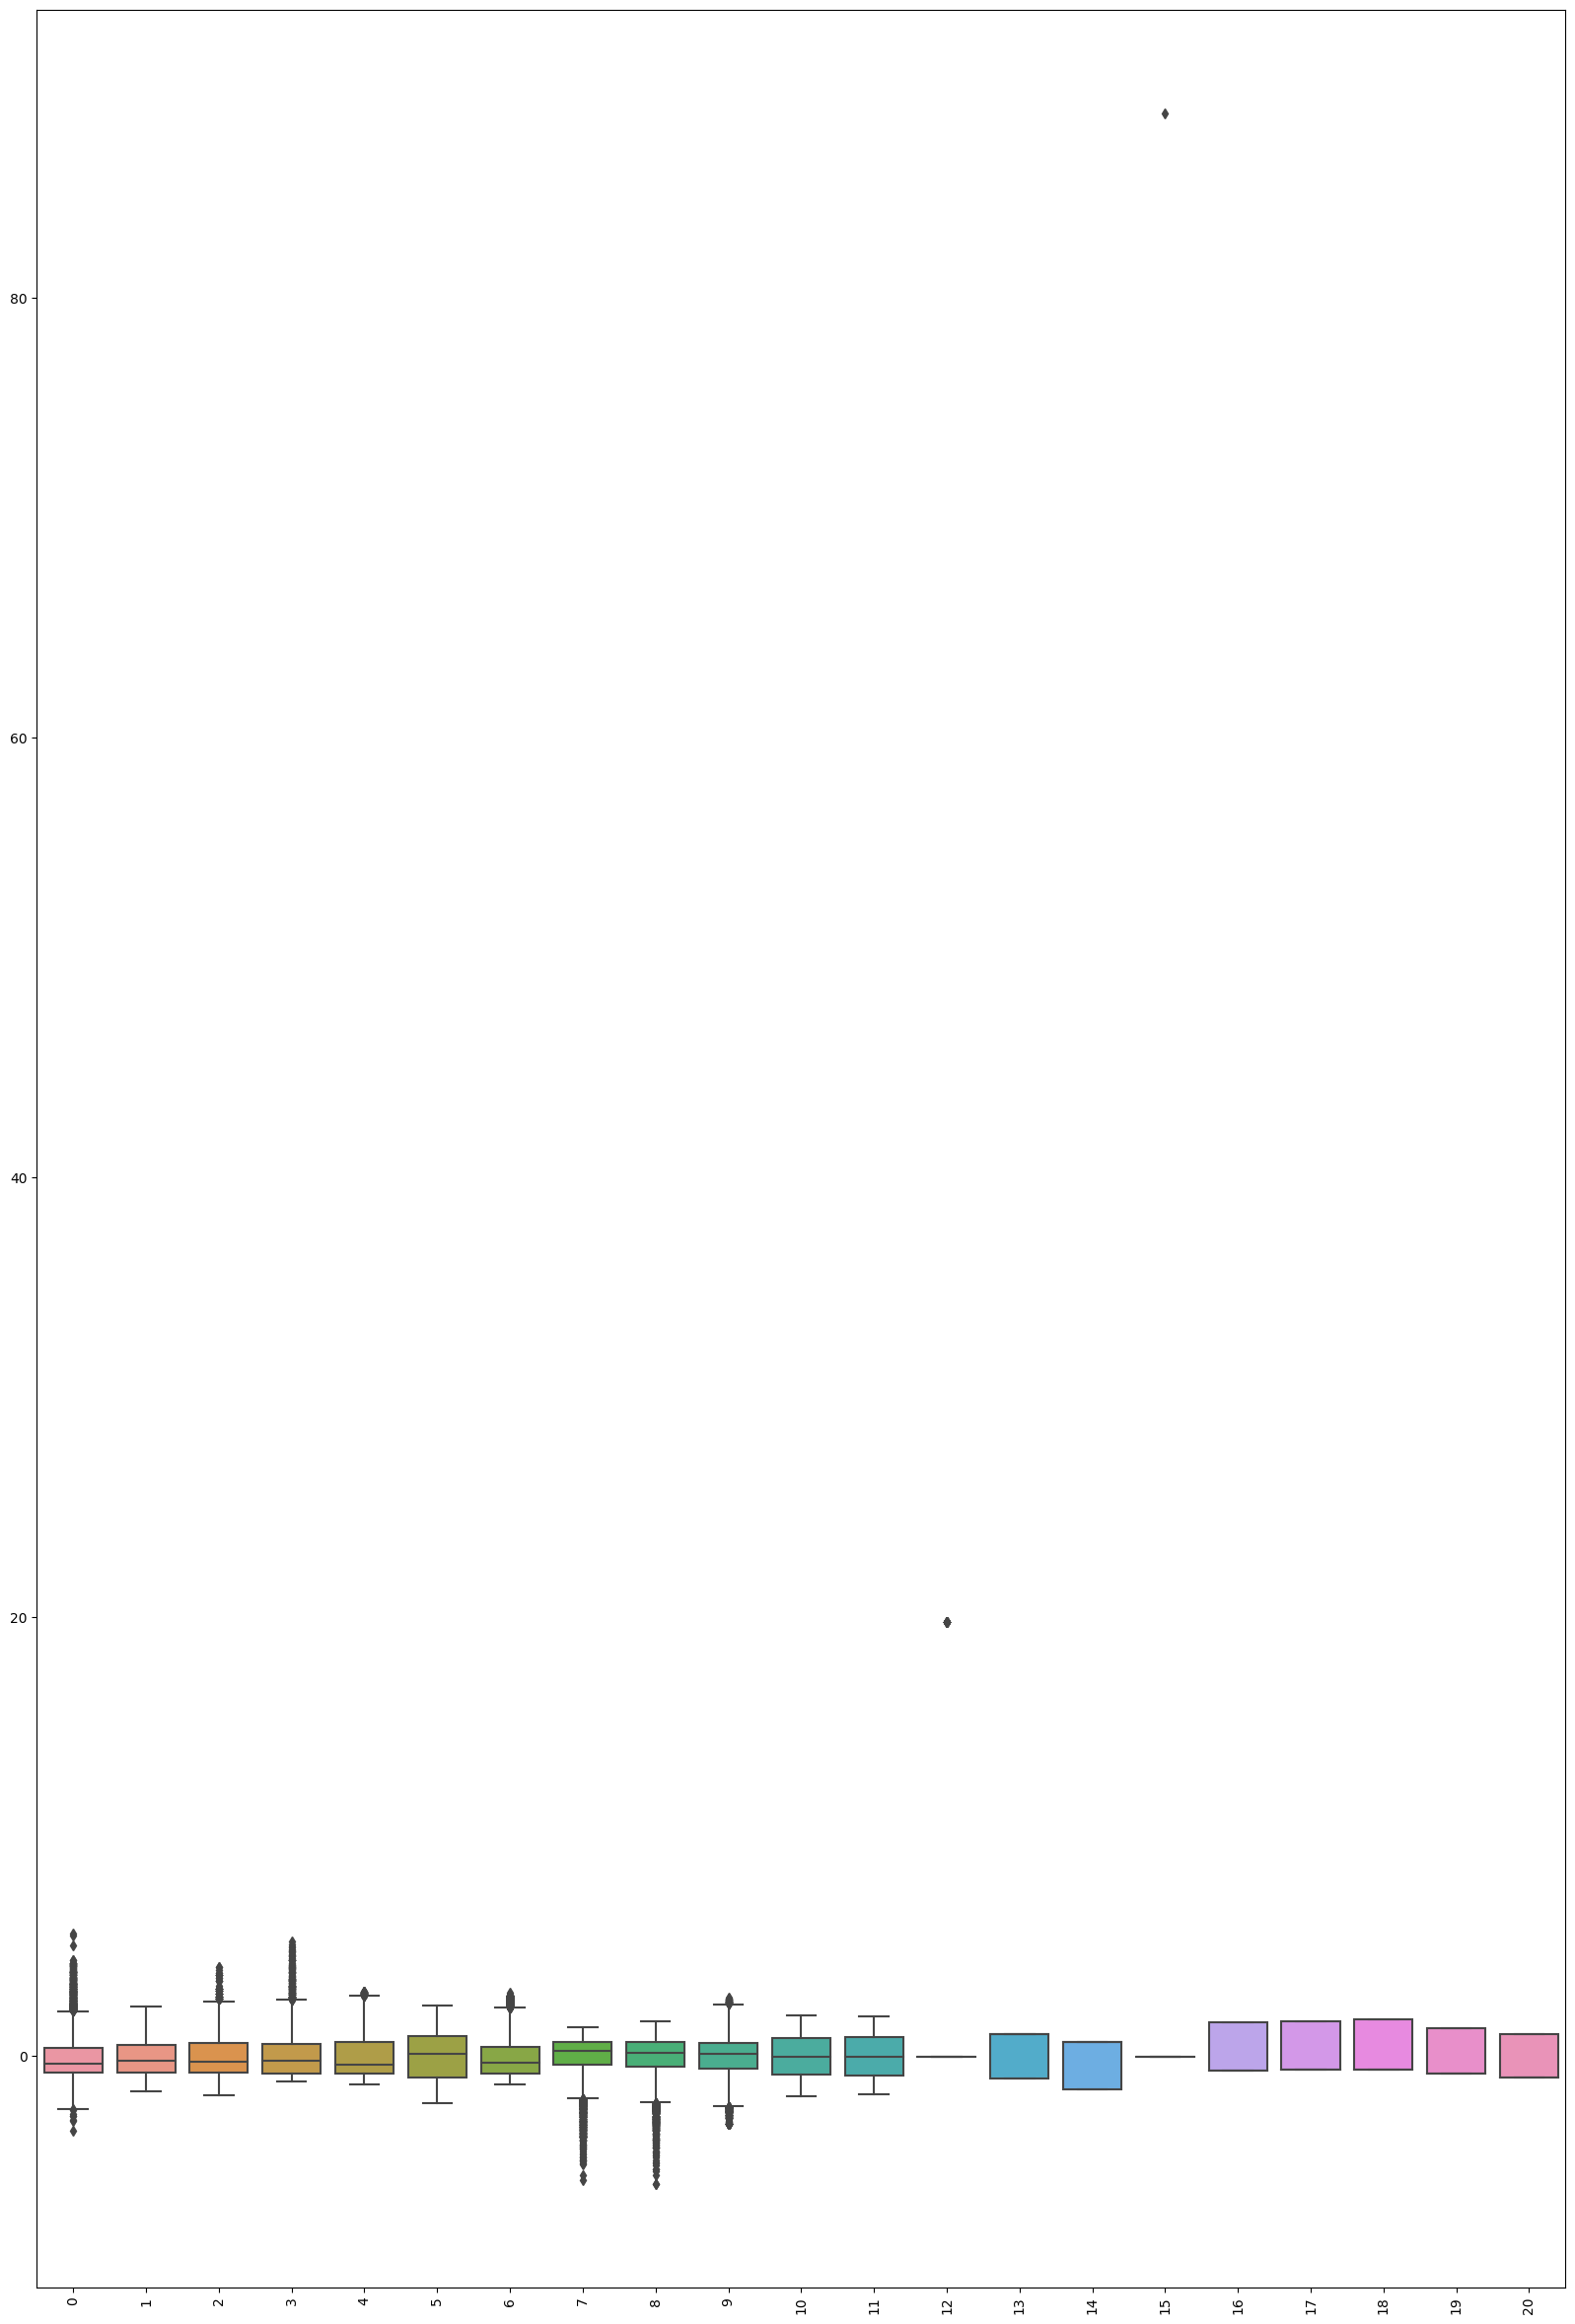

In [27]:
plt.figure(figsize=(20,30))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

In [28]:
# count number of outleirs in each column
#convert numpy array to dataframe
X_train = pd.DataFrame(X_train)
for i in X_train:

    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = X_train[(X_train[i] < (Q1 - 1.5 * IQR)) | (X_train[i] > (Q3 + 1.5 * IQR))]

    # Count number of outliers
    number_of_outliers = len(outliers)

    print(f"Number of outliers in {i}: {number_of_outliers}")

Number of outliers in 0: 439
Number of outliers in 1: 0
Number of outliers in 2: 104
Number of outliers in 3: 154
Number of outliers in 4: 44
Number of outliers in 5: 0
Number of outliers in 6: 419
Number of outliers in 7: 465
Number of outliers in 8: 346
Number of outliers in 9: 214
Number of outliers in 10: 0
Number of outliers in 11: 0
Number of outliers in 12: 20
Number of outliers in 13: 0
Number of outliers in 14: 0
Number of outliers in 15: 1
Number of outliers in 16: 0
Number of outliers in 17: 0
Number of outliers in 18: 0
Number of outliers in 19: 0
Number of outliers in 20: 0


In [29]:
display(y_train_encoded.head())

,BMW,Ford,GMC,Honda,Mercedes,Toyota
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [30]:
def models(parameters,model,X_train,y_train_categorical,X_test,y_test_categorical):
    #grid search for the model
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1)
    grid_search.fit(X_train, y_train_categorical)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print("Best Accuracy: ",best_accuracy)
    print("Parameters: ",best_parameters)
    best_model = grid_search.best_estimator_


    #predicting the test data
    y_pred = best_model.predict(X_test)

    #confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test_categorical, y_pred)
    print(cm)

    #accuracy score
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test_categorical, y_pred)
    print("Test Accuracy",accuracy)

    #classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_test_categorical, y_pred))


    #cross validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=best_model, X=X_train, y=y_train_categorical, cv=10)
    print("Mean Accuracies: ",accuracies.mean())
    print("std Accuracies: ",accuracies.std())

    return best_model


In [31]:
y_train_categorical = np.argmax(y_train_encoded.values, axis=1)
y_test_categorical = np.argmax(y_test_encoded.values, axis=1)

In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regresstion = models(parameters={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},model=LogisticRegression(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)


Best Accuracy:  0.8558476410661131
Parameters:  {'C': 0.5}
[[270  14   0   9   0  10]
 [  0  18   0   0   0   1]
 [  0   0  63   0   0  18]
 [ 13   0   0 188  61   0]
 [  0   0   0  34 283   0]
 [ 19  17  35   0   0 172]]
Test Accuracy 0.8114285714285714
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       303
           1       0.37      0.95      0.53        19
           2       0.64      0.78      0.70        81
           3       0.81      0.72      0.76       262
           4       0.82      0.89      0.86       317
           5       0.86      0.71      0.77       243

    accuracy                           0.81      1225
   macro avg       0.73      0.82      0.75      1225
weighted avg       0.83      0.81      0.81      1225

Mean Accuracies:  0.8558476410661131
std Accuracies:  0.013107099266819865


In [33]:
#SVM
from sklearn.svm import SVC
svm = models(parameters={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},model=SVC(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.8672296976464693
Parameters:  {'C': 1, 'kernel': 'linear'}
[[271  13   0  10   0   9]
 [  0  18   0   0   0   1]
 [  0   0  69   0   0  12]
 [  9   0   0 192  61   0]
 [  0   0   0  34 283   0]
 [ 17  18  35   0   0 173]]
Test Accuracy 0.8212244897959183
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       303
           1       0.37      0.95      0.53        19
           2       0.66      0.85      0.75        81
           3       0.81      0.73      0.77       262
           4       0.82      0.89      0.86       317
           5       0.89      0.71      0.79       243

    accuracy                           0.82      1225
   macro avg       0.74      0.84      0.77      1225
weighted avg       0.84      0.82      0.82      1225

Mean Accuracies:  0.8672296976464693
std Accuracies:  0.012616437906236752


In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = models(parameters={'n_neighbors': [5, 10, 15, 20, 25, 30]},model=KNeighborsClassifier(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.880406947614541
Parameters:  {'n_neighbors': 5}
[[277   4   0   6   0  16]
 [  0  17   0   0   0   2]
 [  4   0  67   1   0   9]
 [ 12   0   0 204  45   1]
 [  0   0   0  17 300   0]
 [ 29  18  29   2   0 165]]
Test Accuracy 0.8408163265306122
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       303
           1       0.44      0.89      0.59        19
           2       0.70      0.83      0.76        81
           3       0.89      0.78      0.83       262
           4       0.87      0.95      0.91       317
           5       0.85      0.68      0.76       243

    accuracy                           0.84      1225
   macro avg       0.77      0.84      0.79      1225
weighted avg       0.85      0.84      0.84      1225

Mean Accuracies:  0.880406947614541
std Accuracies:  0.018429721861079155


In [35]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = models(parameters={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]},model=DecisionTreeClassifier(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.9345137553991701
Parameters:  {'criterion': 'entropy', 'max_depth': 30}
[[277   1   0  10   0  15]
 [  0  19   0   0   0   0]
 [  0   0  69   0   0  12]
 [ 14   0   0 220  28   0]
 [  0   0   0  22 295   0]
 [ 11   7   8   1   0 216]]
Test Accuracy 0.8946938775510204
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       303
           1       0.70      1.00      0.83        19
           2       0.90      0.85      0.87        81
           3       0.87      0.84      0.85       262
           4       0.91      0.93      0.92       317
           5       0.89      0.89      0.89       243

    accuracy                           0.89      1225
   macro avg       0.86      0.90      0.88      1225
weighted avg       0.90      0.89      0.89      1225

Mean Accuracies:  0.9342588195997654
std Accuracies:  0.011015436945916154


In [36]:
!pip install lazypredict

In [37]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train_categorical, y_test_categorical)
models

 97%|█████████▋| 28/29 [00:20<00:00,  2.04it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2552
[LightGBM] [Info] Number of data points in the train set: 7818, number of used features: 20
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759


100%|██████████| 29/29 [00:21<00:00,  1.32it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.94,0.93,None,0.94,1.02
RandomForestClassifier,0.94,0.92,None,0.94,1.31
XGBClassifier,0.94,0.92,None,0.94,0.82
ExtraTreesClassifier,0.94,0.92,None,0.94,0.54
BaggingClassifier,0.92,0.92,None,0.92,0.58
DecisionTreeClassifier,0.89,0.87,None,0.89,0.10
SVC,0.89,0.87,None,0.89,0.76
KNeighborsClassifier,0.84,0.84,None,0.84,0.08
ExtraTreeClassifier,0.85,0.83,None,0.85,0.01


## After Deletting Outliers

In [ ]:

#delete outliers
print(X_train.shape, y_train_categorical.shape)
X_train_no = X_train[~(outliers.any(axis=1))]
y_train_no = y_train_categorical[~(outliers.any(axis=1))]
print(X_train_no.shape, y_train_no.shape)
print(X_train_no.shape, y_train_no.shape)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
print(type(X_train_no),type(y_train_no),type(X_test),type(y_test_categorical))
logistic_regresstion_no = models(parameters={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},model=LogisticRegression(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
#SVM
from sklearn.svm import SVC
svm = models(parameters={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear','rbf']},model=SVC(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = models(parameters={'n_neighbors': [5, 10, 15, 20, 25, 30]},model=KNeighborsClassifier(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = models(parameters={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]},model=DecisionTreeClassifier(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_no, X_test, y_train_no, y_test_categorical)
models

## NN Model

In [38]:
# NN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_auc_score

#split data into train and validation
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# define model
model = Sequential()
model.add(Dense(64, input_dim=X_train_nn.shape[1], activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# compile model
model.compile(loss='ca', optimizer=Adam(learning_rate=0.001), metrics=[AUC()])
model.summary()

# fit model

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X_train_nn, y=y_train_nn, epochs=100, batch_size=128, validation_data=(X_val_nn, y_val_nn), callbacks=[early_stop])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)                6

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


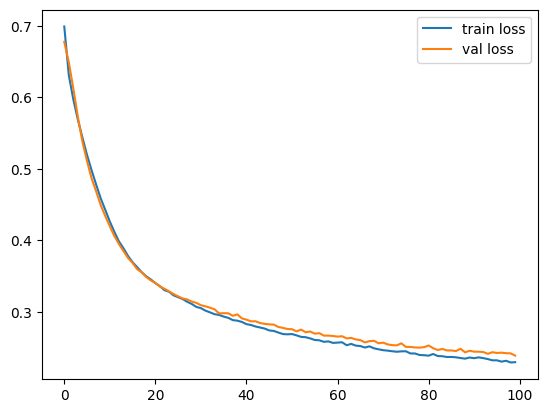

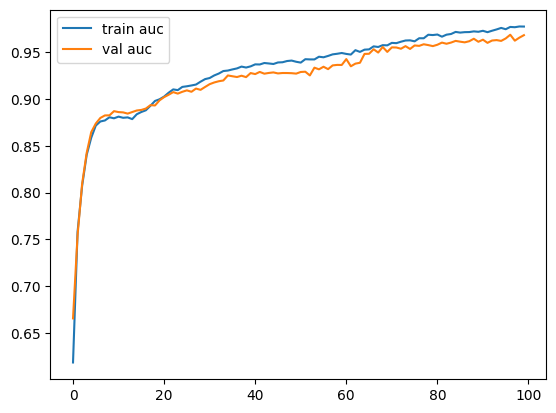

Test Accuracy 0.9387755102040817
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       303
           1       0.64      0.84      0.73        19
           2       0.93      0.93      0.93        81
           3       0.96      0.90      0.93       262
           4       0.93      0.97      0.95       317
           5       0.96      0.89      0.92       243

    accuracy                           0.94      1225
   macro avg       0.89      0.92      0.90      1225
weighted avg       0.94      0.94      0.94      1225

Mean Accuracies:  0.9641899525495216
std Accuracies:  0.01094871660793948


In [56]:
print(history.history.keys())
#  plot loss per iteration
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot auc per iteration
plt.plot(history.history['auc'], label='train auc')
plt.plot(history.history['val_auc'], label='val auc')
plt.legend()
plt.show()

# predict probabilities for test set
y_pred = model.predict(X_test)

#accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_categorical, y_pred)
print("Test Accuracy",accuracy)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred))


#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train_categorical, cv=10)
print("Mean Accuracies: ",accuracies.mean())
print("std Accuracies: ",accuracies.std())





In [58]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]}

#grid search for the model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
grid_search.fit(X_train, y_train_categorical)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: ",best_accuracy)
print("Parameters: ",best_parameters)
best_model = grid_search.best_estimator_


#predicting the test data
y_pred = best_model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_categorical, y_pred)
print(cm)

#accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_categorical, y_pred)
print("Test Accuracy",accuracy)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred))


#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=best_model, X=X_train, y=y_train_categorical, cv=10)
print("Mean Accuracies: ",accuracies.mean())
print("std Accuracies: ",accuracies.std())




Best Accuracy:  0.9658508830242557
Parameters:  {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 500}
[[300   1   0   1   0   1]
 [  0  18   0   0   0   1]
 [  0   0  73   0   0   8]
 [  9   0   0 235  18   0]
 [  0   0   0  12 305   0]
 [ 11   7   3   1   0 221]]
Test Accuracy 0.9404081632653061
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       303
           1       0.69      0.95      0.80        19
           2       0.96      0.90      0.93        81
           3       0.94      0.90      0.92       262
           4       0.94      0.96      0.95       317
           5       0.96      0.91      0.93       243

    accuracy                           0.94      1225
   macro avg       0.91      0.93      0.92      1225
weighted avg       0.94      0.94      0.94      1225

Mean Accuracies:  0.9644443971431471
std Accuracies:  0.00835362799071226


In [59]:
# XGBClassifier Classifier
from xgboost import XGBClassifier
parameters={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25, 30]}


#grid search for the model
grid_search = GridSearchCV(estimator=XGBClassifier(),
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
grid_search.fit(X_train, y_train_categorical)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: ",best_accuracy)
print("Parameters: ",best_parameters)
best_model = grid_search.best_estimator_


#predicting the test data
y_pred = best_model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_categorical, y_pred)
print(cm)

#accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_categorical, y_pred)
print("Test Accuracy",accuracy)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred))


#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=best_model, X=X_train, y=y_train_categorical, cv=10)
print("Mean Accuracies: ",accuracies.mean())
print("std Accuracies: ",accuracies.std())




Best Accuracy:  0.9659800701441851
Parameters:  {'max_depth': 5, 'n_estimators': 500}
[[299   1   0   2   0   1]
 [  0  16   0   0   0   3]
 [  0   0  74   0   0   7]
 [  5   0   0 238  19   0]
 [  0   0   0  12 305   0]
 [ 13   7   5   0   0 218]]
Test Accuracy 0.9387755102040817
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       303
           1       0.67      0.84      0.74        19
           2       0.94      0.91      0.92        81
           3       0.94      0.91      0.93       262
           4       0.94      0.96      0.95       317
           5       0.95      0.90      0.92       243

    accuracy                           0.94      1225
   macro avg       0.90      0.92      0.91      1225
weighted avg       0.94      0.94      0.94      1225

Mean Accuracies:  0.9659800701441851
std Accuracies:  0.009410214385479579
